In [1]:
import math
import matplotlib as mp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import phate
import pygam as pg
import scanpy as sc
import scipy
import umap

from matplotlib import cm
from matplotlib.text import Annotation
from matplotlib.font_manager import FontProperties
from sklearn.manifold import TSNE

import warnings
from train_metric import train_metric_learner

import numpy as np
import scanpy as sc
import torch
import pandas as pd
import matplotlib.pyplot as plt

# Trajectory Visualization
from sklearn.neighbors import NearestNeighbors

from models.ti.connectivity import compute_directed_cluster_connectivity, compute_undirected_cluster_connectivity
from models.ti.graph import compute_trajectory_graph, compute_connectivity_graph, compute_trajectory_graph_v2
from utils.plot import plot_connectivity_graph, plot_trajectory_graph, plot_connectivity_graph_with_gene_expressions
from utils.util import get_start_cell_cluster_id

from matplotlib import cm
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from models.ti.pseudotime import compute_pseudotime
from models.ti.pseudotime_v2 import compute_pseudotime

from utils.plot import plot_trajectory_graph_v2
from utils.plot import plot_pseudotime
from anndata import AnnData as am

from utils.plot import plot_lineage_trends

from utils.plot import generate_plot_embeddings, plot_gene_expression, plot_embeddings, plot_clusters

from utils_test import *

random_seed = 0
np.random.seed(random_seed)
torch.manual_seed(random_seed)

/home/ajita/anaconda3/envs/margaret/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


import os
os.getcwd() #Hs-alpha_merged_human
os.chdir("/data/Ajita/Islet/Margaret/margaret")

data_path = "/data/Ajita/Islet/data/"

adata_ = sc.read(data_path + "beta_all_population_dataSep12.h5ad")


/home/ajita/anaconda3/envs/margaret/lib/python3.7/site-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,


In [3]:
import pandas as pd
pd.__version__

'1.3.5'

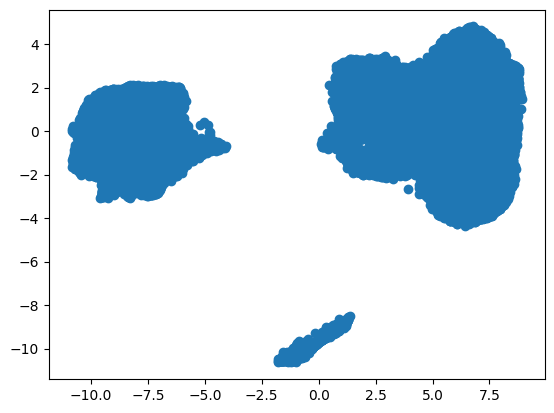

In [4]:

plt.scatter(adata_.obsm["X_harmony_umap"][:,0], adata_.obsm["X_harmony_umap"][:,1])
plt.show() 

In [5]:
plt.rcParams['figure.dpi']=300

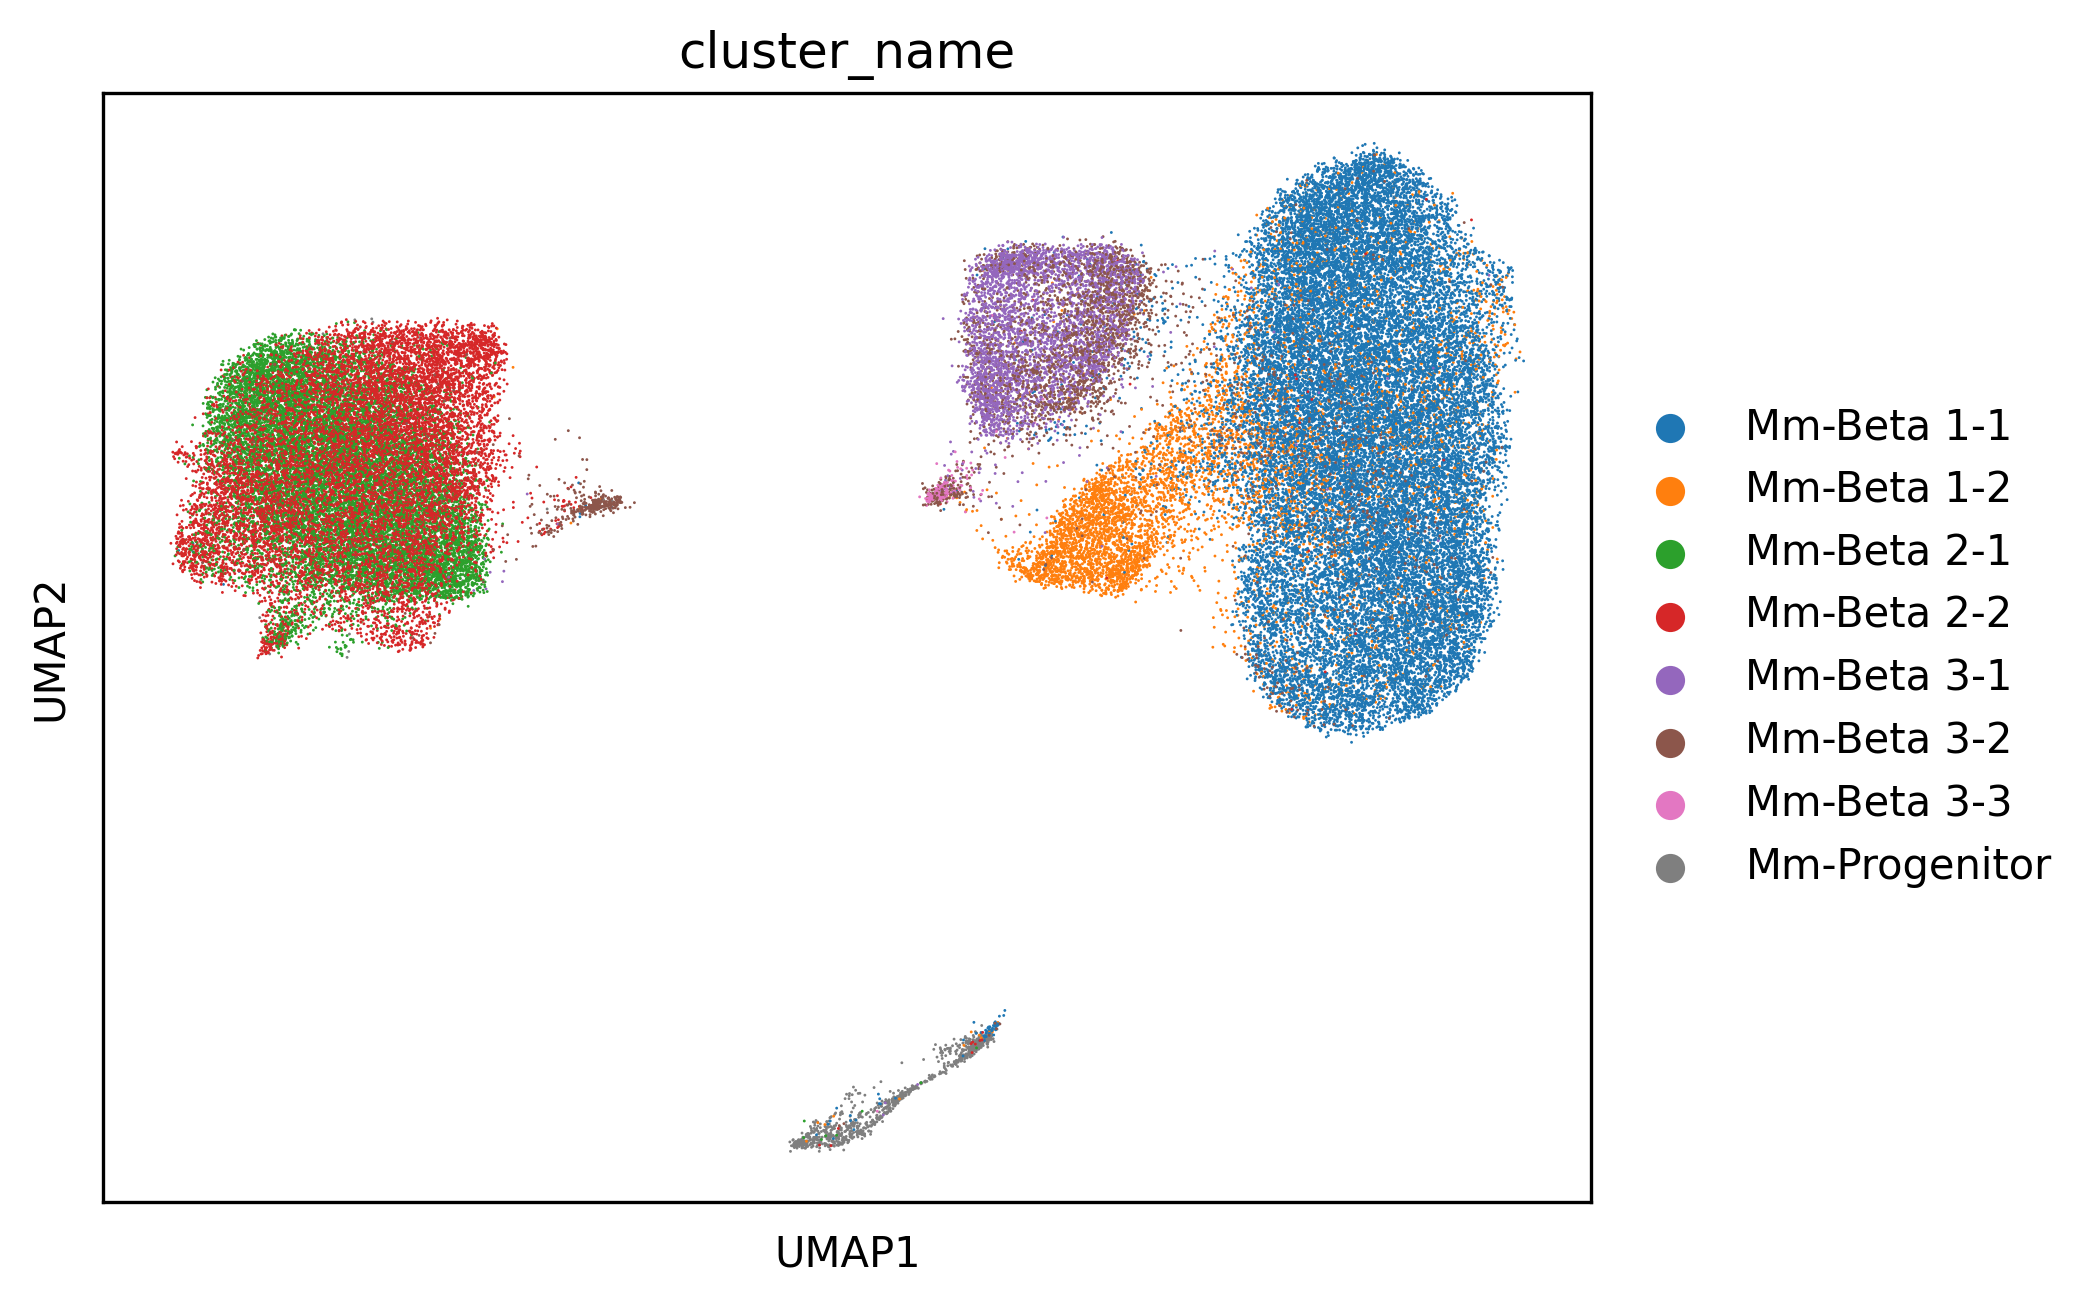

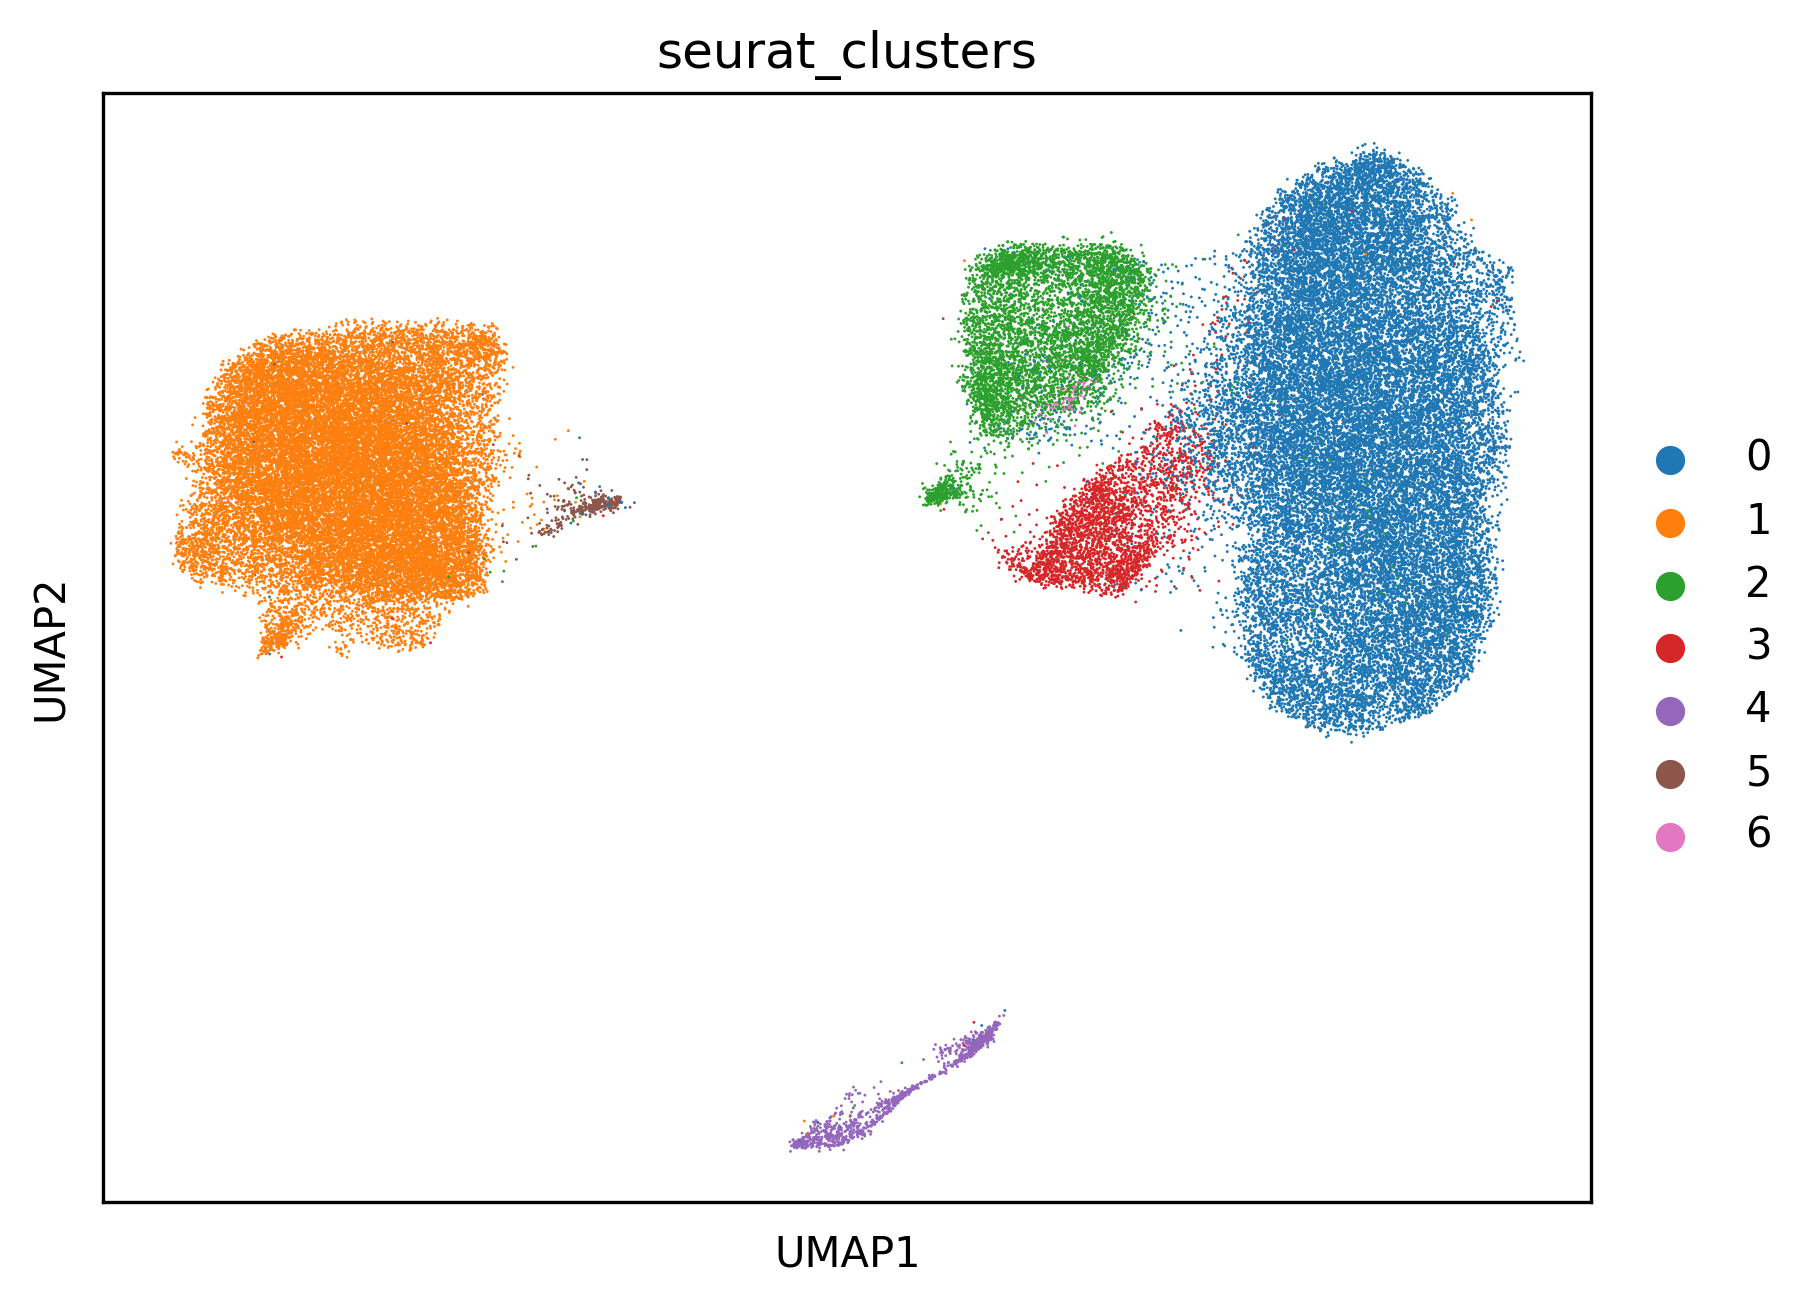

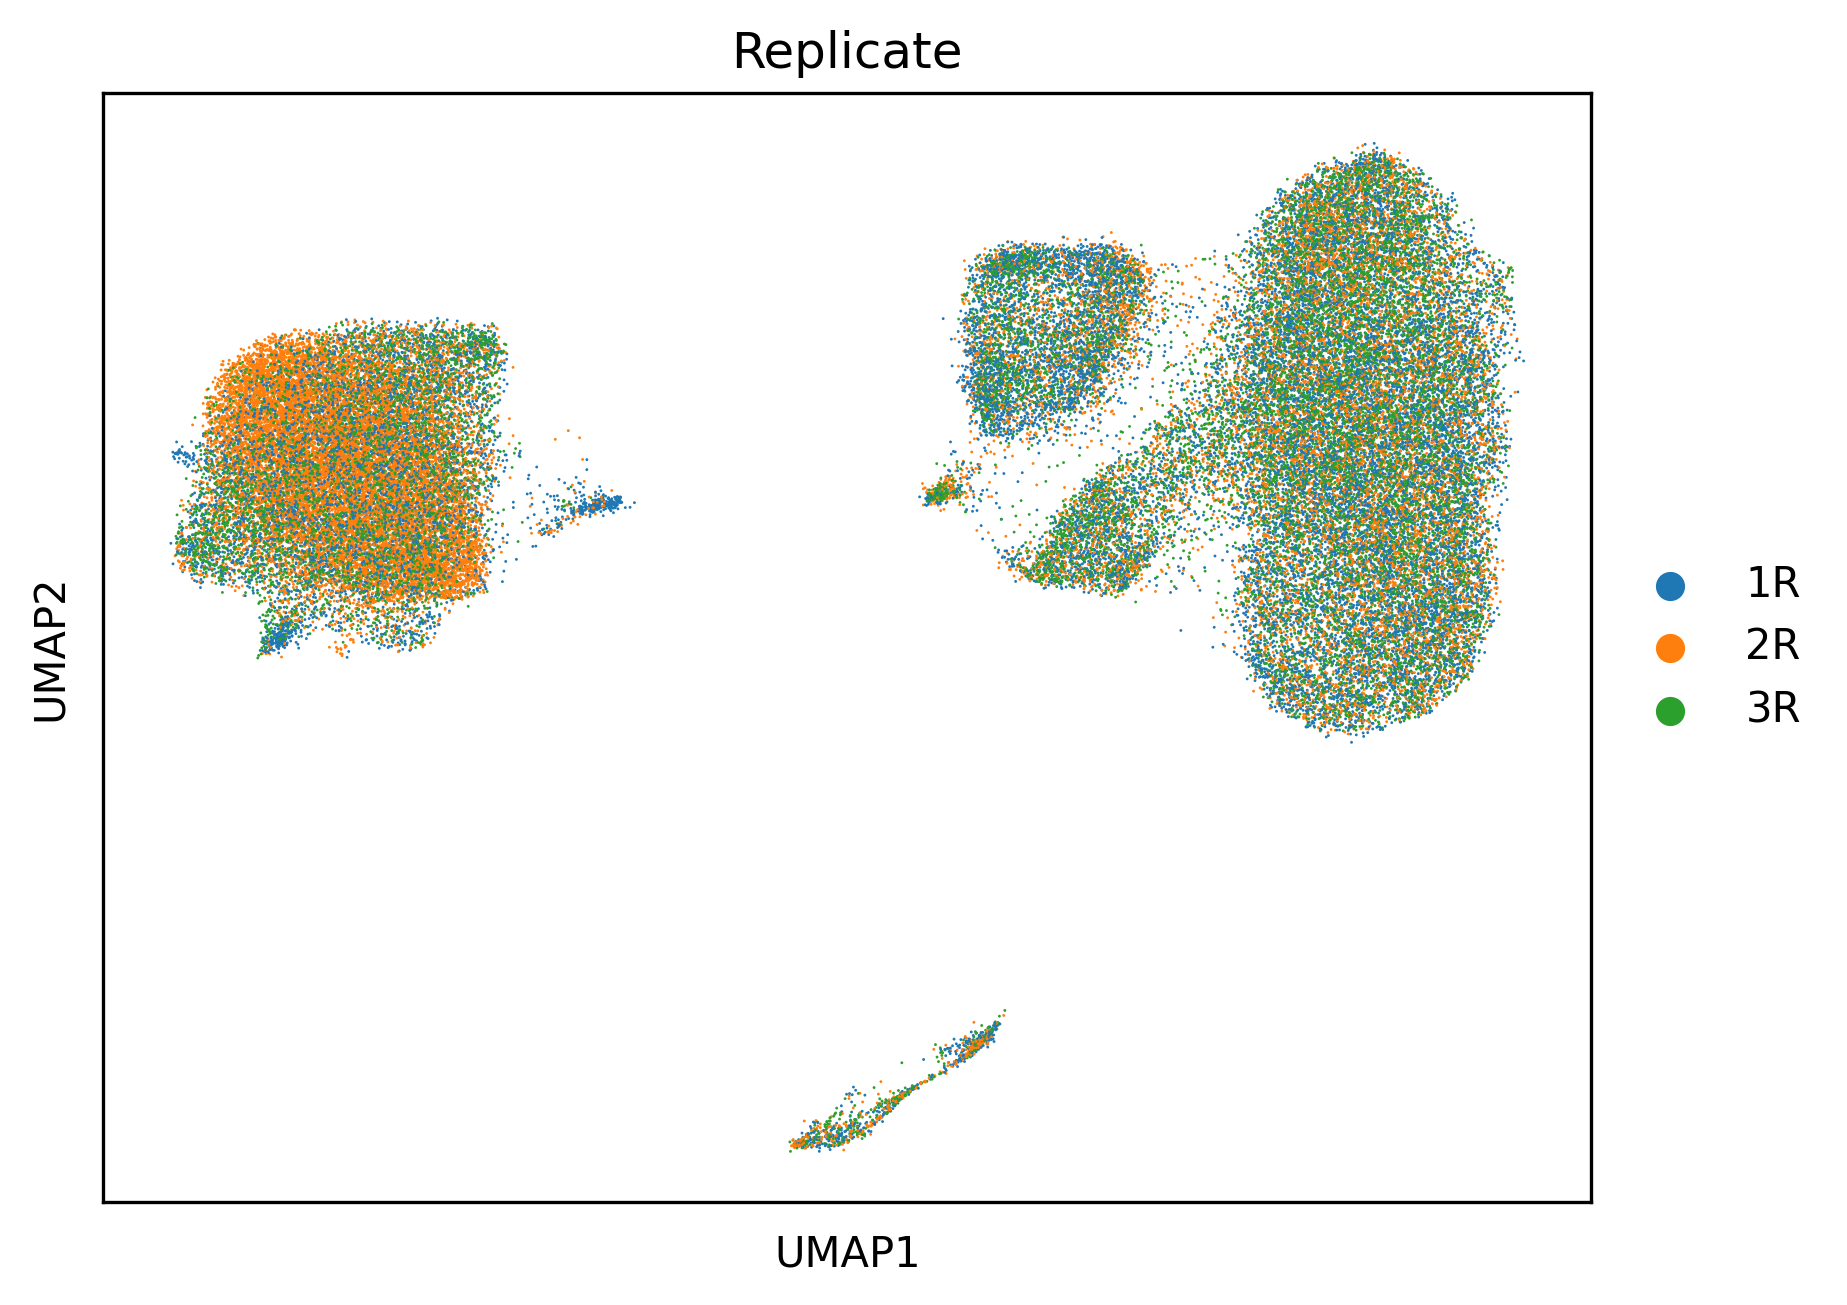

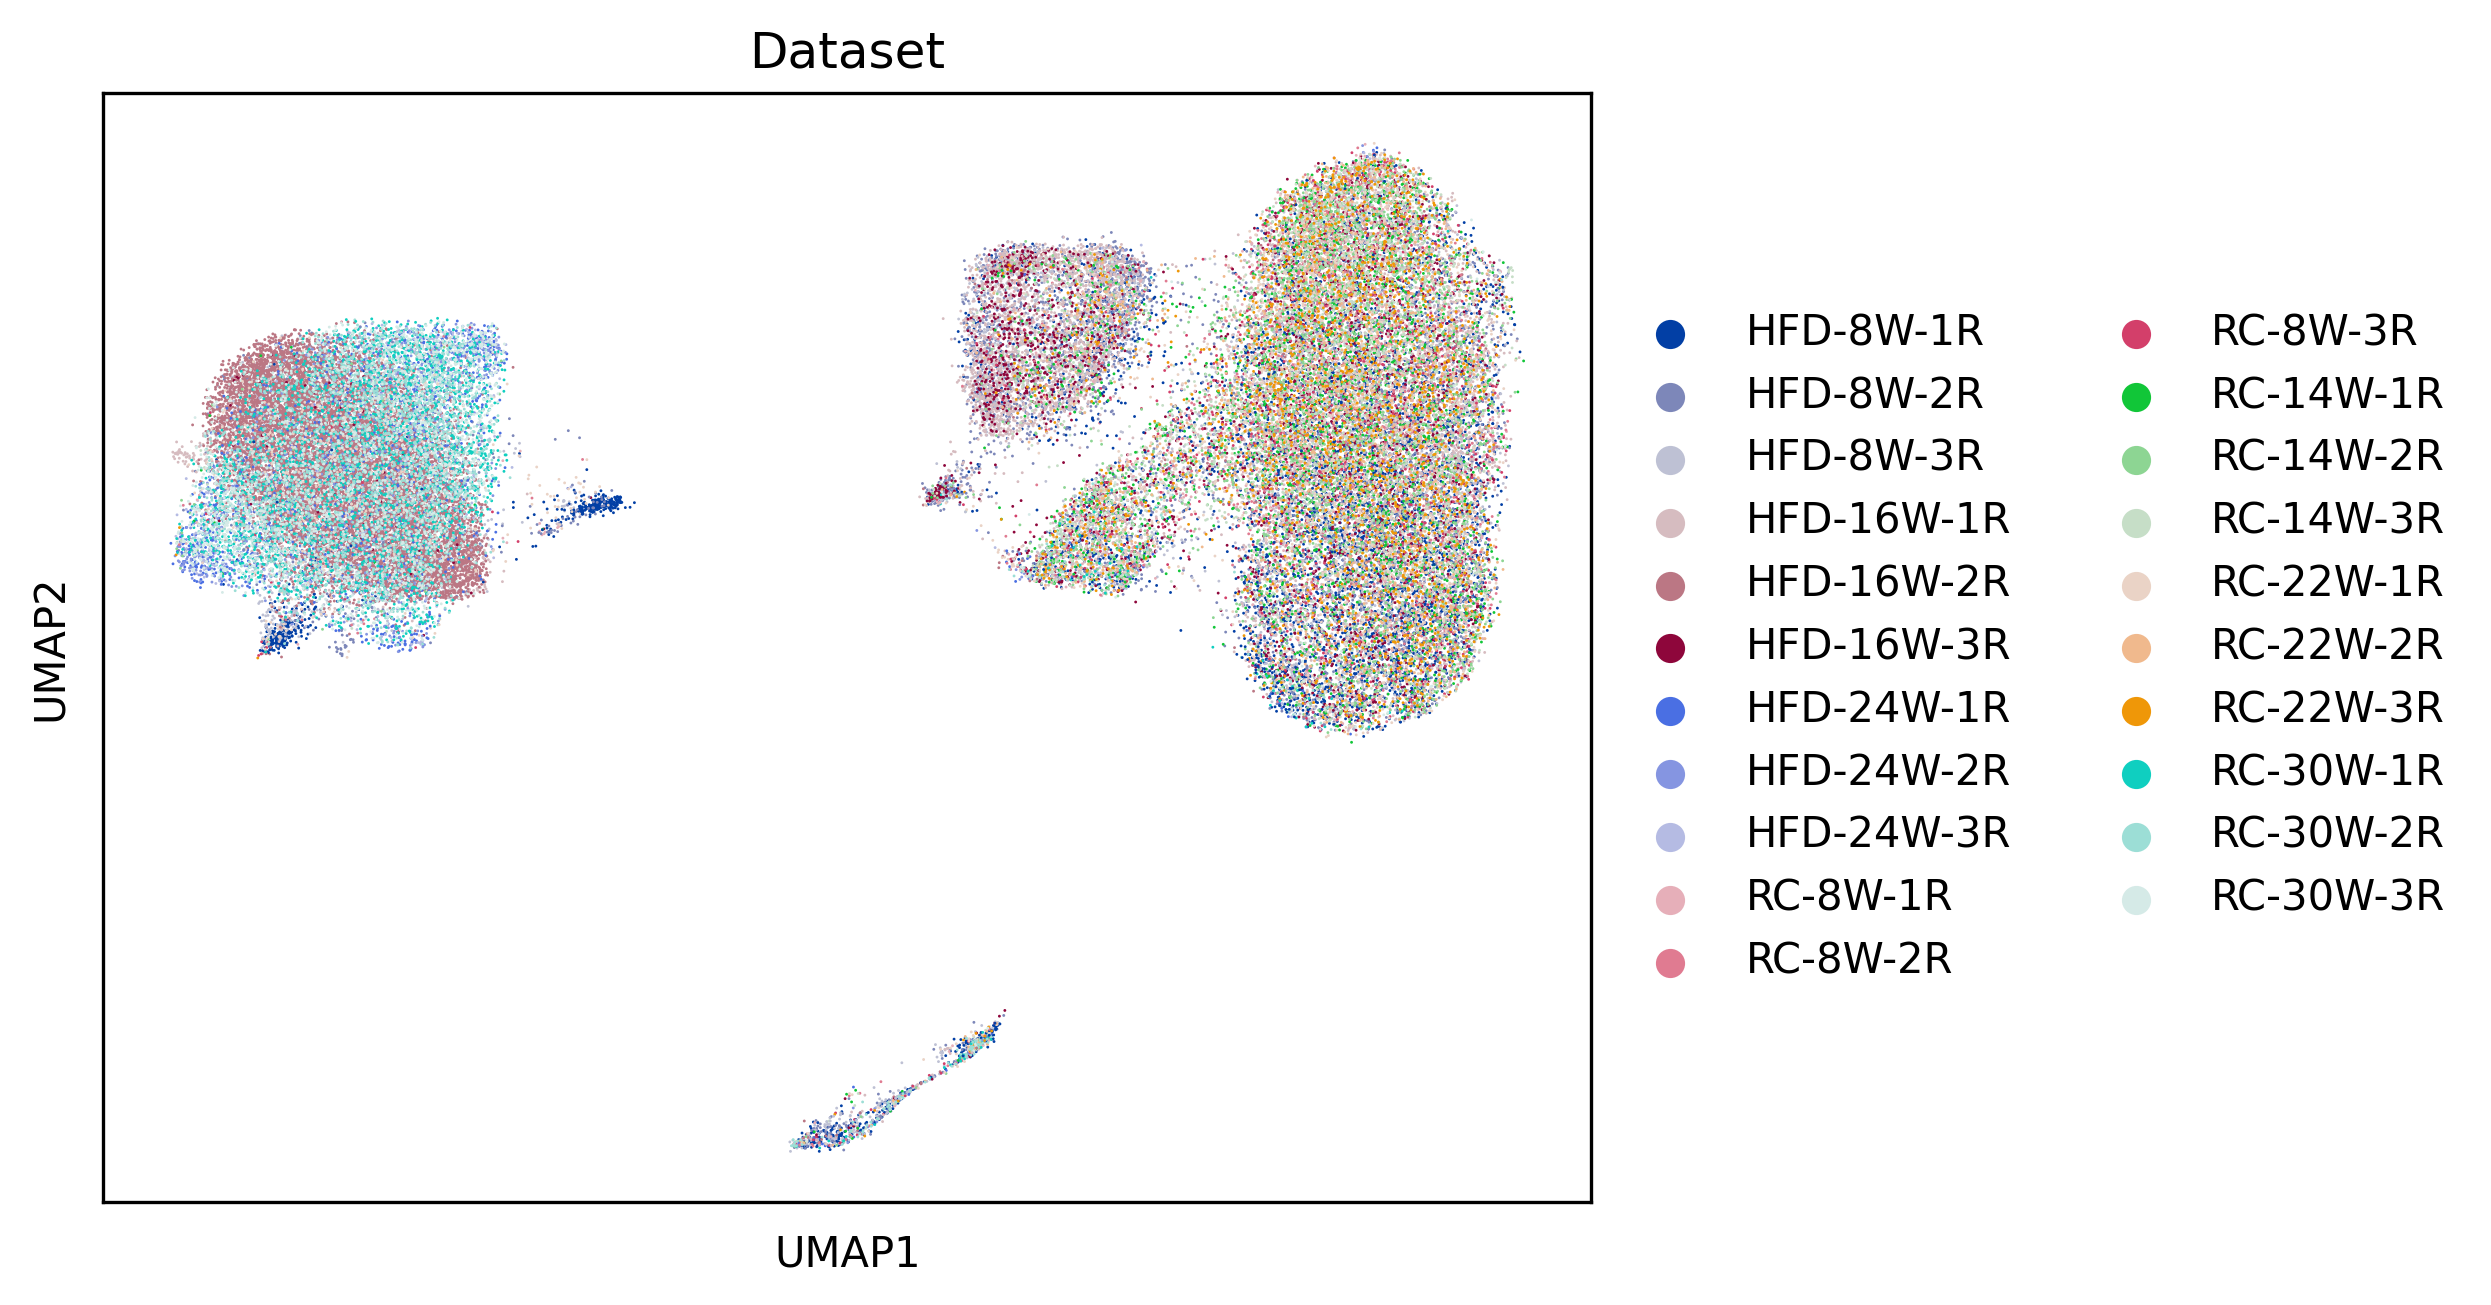

In [6]:
adata_.obsm['X_umap'] = adata_.obsm['X_harmony_umap']
adata_.obs['seurat_clusters'] = adata_.obs['seurat_clusters'].astype("category")
sc.pl.umap(adata_, color = ["cluster_name"])
sc.pl.umap(adata_, color = ["seurat_clusters"])
sc.pl.umap(adata_, color = ["Replicate"])
sc.pl.umap(adata_, color = ["Dataset"])

In [7]:
#adata = adata_[adata_.obs['cluster_name'].isin(col_names)]
adata = adata_.copy()

In [8]:
adata.obsm['X_umap'] = adata.obsm['X_harmony_umap']

In [9]:

"""
afirst = adata[adata.obs['Dataset'].isin(['RC-8W-1R', 'RC-8W-2R', 'RC-8W-3R'])]
start_ids = afirst[afirst.obs['beta_sub_subpopulations'] == "Mm-Progenitor"].obs_names.to_list()
"""

start_ids = adata[adata.obs['cluster_name'] == "Mm-Progenitor"].obs_names.to_list()


with warnings.catch_warnings():

    warnings.simplefilter("ignore") #X_harmony
    train_metric_learner(adata, n_episodes=10, n_metric_epochs = 1, obsm_data_key='X_harmony', code_size = 10, # X_pca, preprocessed_data
        backend='leiden', device='cuda', save_path=data_path,
        cluster_kwargs={'random_state': 0, 'resolution': 0.8}, nn_kwargs={'random_state': 0, 'n_neighbors': 30}, #'resolution': 1.0, 0.6, 0.01
        trainer_kwargs={
            'optimizer': 'SGD',
            'lr': 0.01,
            'batch_size': 256,
            'train_loader_kwargs': {'num_workers': 2, 'pin_memory': True, 'drop_last': True}
        },
        loss_kwargs={
            'margin': 1.0,
            'p': 2
        }
    )
    
    


Generating initial clusters
Training for episode: 1


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4106.62it/s]


Re-generating clusters for episode: 1
Runtime for determine_cell_clusters(): 68.88365936279297
Time Elapsed for epoch: 99.29457449913025s
Training for episode: 2


100%|███████████████████████████████████| 64306/64306 [00:17<00:00, 3744.03it/s]


Re-generating clusters for episode: 2
Runtime for determine_cell_clusters(): 47.589574337005615
Time Elapsed for epoch: 83.51790261268616s
Training for episode: 3


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4061.22it/s]


Re-generating clusters for episode: 3
Runtime for determine_cell_clusters(): 49.23640322685242
Time Elapsed for epoch: 82.9156277179718s
Training for episode: 4


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4062.37it/s]


Re-generating clusters for episode: 4
Runtime for determine_cell_clusters(): 46.59360098838806
Time Elapsed for epoch: 80.34810447692871s
Training for episode: 5


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4026.87it/s]


Re-generating clusters for episode: 5
Runtime for determine_cell_clusters(): 45.785407066345215
Time Elapsed for epoch: 79.33839082717896s
Training for episode: 6


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4058.06it/s]


Re-generating clusters for episode: 6
Runtime for determine_cell_clusters(): 49.94424319267273
Time Elapsed for epoch: 83.76039171218872s
Training for episode: 7


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4035.53it/s]


Re-generating clusters for episode: 7
Runtime for determine_cell_clusters(): 50.373191595077515
Time Elapsed for epoch: 84.44866585731506s
Training for episode: 8


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4103.35it/s]


Re-generating clusters for episode: 8
Runtime for determine_cell_clusters(): 55.43341326713562
Time Elapsed for epoch: 87.52330422401428s
Training for episode: 9


100%|███████████████████████████████████| 64306/64306 [00:15<00:00, 4057.57it/s]


Re-generating clusters for episode: 9
Runtime for determine_cell_clusters(): 57.42931318283081
Time Elapsed for epoch: 90.57658243179321s
Training for episode: 10


100%|███████████████████████████████████| 64306/64306 [00:18<00:00, 3531.06it/s]


Re-generating clusters for episode: 10
Runtime for determine_cell_clusters(): 41.51896595954895
Time Elapsed for epoch: 76.81789946556091s
Runtime for train_metric_learner(): 851.6540222167969


In [12]:
adata

AnnData object with n_obs × n_vars = 64306 × 2000
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'decontX_contamination', 'decontX_clusters', 'sizeFactor', 'Dataset', 'Replicate', 'Week', 'Diet', 'nCount_RNA', 'nFeature_RNA', 'RNA_snn_res.0.05', 'seurat_clusters', 'cluster_name', 'cluster_name_rename', 'RNA_snn_res.0.06', 'Diet_Week', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'seurat_clusters_dataset', 'cluster_rename', 'RNA_snn_res.0.5', 'RNA_snn_res.0.02', 'RNA_snn_res.0.6', 'RNA_snn_res.0.4', 'RNA_snn_res.0.15', 'RNA_snn_res.0.125', 'RNA_snn_res.0.11', 'RNA_snn_res.0.3', 'RNA_snn_res.5', 'RNA_snn_res.0.18', 'RNA_snn_res.0.25', 'RNA_snn_res.0.8', 'RNA_snn_res.1.5', 'RNA_snn_res.0.13', 'RNA_snn_res.0.7', 'RNA_snn_res.0.9', 'RNA_snn_res.0.005', 'RNA_snn_res.0.01', 'RNA_snn_res.0.03', 'RNA_snn_res.0.04', 'RNA_snn_res.0.07', 'RNA_snn_res.0.08', 'RNA_snn_res.0.09', 'cell_diet

### Save anndata file

In [ ]:
adata.write_h5ad("Margaret_run_beta.h5ad")